<a href="https://colab.research.google.com/github/JCMVP92/DataCleaning/blob/main/Limpieza_de_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nuestros Datasets:

*   Derrumbes 
*   Fifa








In [ ]:
#importamos nuestra paquueterias

import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import chardet
import matplotlib.pyplot as plt

In [ ]:
derrumbes = pd.read_csv("derrumbes.csv")
fifa = pd.read_csv("fifa.csv")



In [ ]:
#Veamos como se ven los datos en el data de derrumbes 
derrumbes.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [ ]:
#Obtengamos la informacion de los datos del mismo data
derrumbes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1693 non-null   int64  
 1   date                  1690 non-null   object 
 2   time                  629 non-null    object 
 3   continent_code        164 non-null    object 
 4   country_name          1693 non-null   object 
 5   country_code          1693 non-null   object 
 6   state/province        1692 non-null   object 
 7   population            1693 non-null   int64  
 8   city/town             1689 non-null   object 
 9   distance              1692 non-null   float64
 10  location_description  551 non-null    object 
 11  latitude              1692 non-null   float64
 12  longitude             1692 non-null   float64
 13  geolocation           1692 non-null   object 
 14  hazard_type           1693 non-null   object 
 15  landslide_type       

In [ ]:
#Podemos observar que la columna de DATE es una object debemos convertirlo a formato DATE
derrumbes["date"].head()


In [ ]:
derrumbes["date_format"] = pd.to_datetime(derrumbes["date"]) #ponemos formato a la fecha por mes/dia/año creando una nueva columna llamada date_format
derrumbes["date_format"].head()


0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_format, dtype: datetime64[ns]

In [ ]:
dia_del_mes_derrumbes = derrumbes["date_format"].dt.day
dia_del_mes_derrumbes

0        2.0
1       22.0
2        6.0
3       14.0
4       15.0
        ... 
1688     7.0
1689    22.0
1690    23.0
1691    26.0
1692     2.0
Name: date_format, Length: 1693, dtype: float64

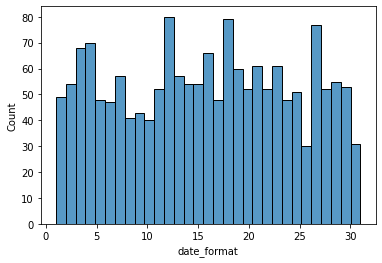

In [ ]:
sns.histplot(dia_del_mes_derrumbes, bins=31)

In [ ]:
mes_derrumbes = derrumbes["date_format"].dt.month
mes_derrumbes

0        3.0
1        3.0
2        4.0
3        4.0
4        4.0
        ... 
1688    12.0
1689     2.0
1690     2.0
1691     2.0
1692     3.0
Name: date_format, Length: 1693, dtype: float64

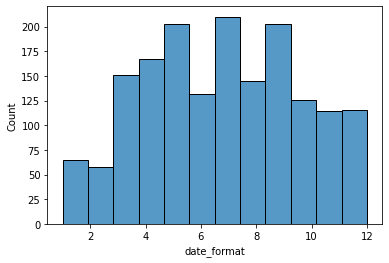

In [ ]:
mes_derrumbes = mes_derrumbes.dropna()
sns.histplot(mes_derrumbes, bins=12)

In [ ]:
#usemos otro dataset
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [ ]:
fifa_duplicados = fifa.duplicated()
fifa_duplicados

0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Length: 18207, dtype: bool

In [ ]:
sum(fifa.duplicated())

0

In [ ]:
fifa.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [ ]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [ ]:
fifa["Wage"]

0        €565K
1        €405K
2        €290K
3        €260K
4        €355K
         ...  
18202      €1K
18203      €1K
18204      €1K
18205      €1K
18206      €1K
Name: Wage, Length: 18207, dtype: object

In [ ]:
mi_diccionario = {ord('€'): None, ord('K'): None }
fifa['wage_trimmed'] = fifa['Wage'].str.translate(mi_diccionario)    
fifa['wage_trimmed']

0        565
1        405
2        290
3        260
4        355
        ... 
18202      1
18203      1
18204      1
18205      1
18206      1
Name: wage_trimmed, Length: 18207, dtype: object

In [ ]:
fifa['wage_numeric'] = fifa['wage_trimmed'].astype(int) * 1000
fifa['wage_numeric']

0        565000
1        405000
2        290000
3        260000
4        355000
          ...  
18202      1000
18203      1000
18204      1000
18205      1000
18206      1000
Name: wage_numeric, Length: 18207, dtype: int64

In [ ]:
fifa['wage_numeric'].max()

565000

In [ ]:
fifa[fifa['wage_numeric']<=565000]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,wage_trimmed,wage_numeric
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,565,565000
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,405,405000
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,290,290000
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,260,260000
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,355,355000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K,1,1000
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K,1,1000
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K,1,1000
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K,1,1000


In [ ]:
#quien es el jugador con mayor acelereacion en el data
fifa['Acceleration'].max()
fifa[fifa['Acceleration']==97.0]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,wage_trimmed,wage_numeric
65,65,190483,Douglas Costa,27,https://cdn.sofifa.org/players/4/19/190483.png,Brazil,https://cdn.sofifa.org/flags/54.png,86,86,Juventus,...,38.0,34.0,13.0,15.0,9.0,12.0,5.0,€76.7M,175,175000
1968,1968,213956,Adama,22,https://cdn.sofifa.org/players/4/19/213956.png,Spain,https://cdn.sofifa.org/flags/45.png,75,85,Wolverhampton Wanderers,...,26.0,23.0,13.0,9.0,11.0,12.0,7.0,€22.1M,54,54000


In [ ]:
fifa["Age"].max()

45

In [ ]:
fifa[fifa['Age']==45]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,wage_trimmed,wage_numeric
4741,4741,140029,O. Pérez,45,https://cdn.sofifa.org/players/4/19/140029.png,Mexico,https://cdn.sofifa.org/flags/83.png,71,71,Pachuca,...,12.0,11.0,70.0,64.0,65.0,73.0,74.0,€272K,8,8000


In [ ]:
#Crear una tabla con los nombre edades y ganancias por jugador 
fifa_new = pd.pivot_table(fifa,index=["Name", "Age", "wage_numeric"])
fifa_new

,,,Acceleration,Aggression,Agility,Balance,BallControl,Composure,Crossing,Curve,Dribbling,FKAccuracy,...,SlidingTackle,Special,SprintSpeed,Stamina,StandingTackle,Strength,Unnamed: 0,Vision,Volleys,Weak Foot
Name,Age,wage_numeric,,,,,,,,,,,,,,,,,,,,,
A. Abang,21,1000,68.0,56.0,66.0,61.0,59.0,45.0,30.0,30.0,56.0,28.0,...,21.0,1468.0,68.0,68.0,17.0,74.0,13632.0,41.0,58.0,2.0
A. Abdellaoui,25,4000,66.0,60.0,50.0,58.0,47.0,51.0,56.0,30.0,39.0,35.0,...,65.0,1481.0,63.0,59.0,66.0,65.0,15665.0,46.0,32.0,2.0
A. Abdennour,28,24000,52.0,78.0,60.0,51.0,51.0,75.0,56.0,48.0,48.0,39.0,...,75.0,1726.0,54.0,67.0,73.0,83.0,3055.0,53.0,32.0,3.0
A. Abdi,31,13000,62.0,74.0,66.0,70.0,74.0,75.0,68.0,68.0,70.0,73.0,...,57.0,1833.0,54.0,49.0,60.0,57.0,6388.0,72.0,64.0,4.0
A. Abdu Jaber,21,4000,70.0,29.0,59.0,74.0,59.0,49.0,39.0,59.0,61.0,39.0,...,15.0,1494.0,69.0,63.0,13.0,57.0,12816.0,55.0,64.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Óscar Gil,20,1000,69.0,56.0,57.0,65.0,50.0,45.0,61.0,38.0,57.0,41.0,...,66.0,1481.0,58.0,62.0,65.0,55.0,15334.0,41.0,36.0,3.0
Óscar Pinchi,22,11000,69.0,39.0,73.0,80.0,70.0,63.0,67.0,61.0,69.0,44.0,...,34.0,1667.0,69.0,48.0,39.0,51.0,9803.0,59.0,55.0,3.0
Óscar Plano,27,18000,79.0,58.0,78.0,64.0,73.0,69.0,74.0,78.0,72.0,68.0,...,26.0,1854.0,79.0,85.0,30.0,67.0,2564.0,70.0,58.0,4.0


<Figure size 1800x1800 with 0 Axes>

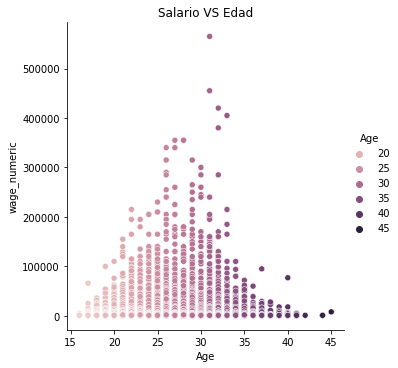

In [ ]:
plt.figure(figsize = (25,25))
sns.relplot(x="Age", y="wage_numeric", hue="Age" , data=fifa).set(title = "Salario VS Edad")


In [ ]:
fifa.groupby(["Age", "Acceleration"]).size()



Age  Acceleration
16   20.0            1
     24.0            1
     27.0            1
     31.0            1
     51.0            1
                    ..
41   53.0            1
42   52.0            1
44   15.0            1
     23.0            1
45   60.0            1
Length: 1565, dtype: int64

In [ ]:
fifa['Acceleration'].value_counts().head(11)

69.0    759
68.0    741
67.0    685
74.0    614
66.0    608
65.0    568
75.0    568
72.0    549
78.0    528
73.0    527
76.0    523
Name: Acceleration, dtype: int64

In [ ]:
top5 = list(fifa['Acceleration'].value_counts().index[:5])
fifa['Acceleration2'] = fifa['Acceleration']

print(top5)

top3 = list(fifa['Age'].value_counts().index[:5])
fifa['Age2'] = fifa['Age']

print(top3)


[69.0, 68.0, 67.0, 74.0, 66.0]
[21, 26, 24, 22, 23]
